<a href="https://colab.research.google.com/github/KimJunGu9/6.DL/blob/main/12_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# 학습 데이터 셋
x_train = torch.FloatTensor([[1], [2], [3], [4]])
y_train = torch.FloatTensor([[50], [70], [90], [85]])

In [ ]:
# y = W(Weight)x + b(bias)

'''
y = 20x + 15   (weight값과 bias값은 아무거나 넣음)

시간    1   2   3   4
실제값 50  70  90  85
예측값 35  55  75  95
---------------------
오차값 15  15  15 -10
'''

# mse(평균 제곱 오차: Mean Squared Error)  # 제일 많이 씀
# 오차를 제곱하고 평균으로 나눈 것



# 코드를 재실행해도 같은 랜덤 결과가 나오도록 하는 것이 manual_seed()이다
torch.manual_seed(10) # seed안에 있는 숫자는 아무거나 넣어도 됨



print(x_train)
print(x_train.shape)

print(y_train)
print(y_train.shape)



# 선형회귀의 핵심은 학습데이터와 가장 잘 맞는 직선을 찾는 작업

# requires_grad=True: 학습을 통해 변경되는 변수
# 고로 W와 b는 학습을 통해서 계속 변할 변수이다.
# y = 0*x + 0
W = torch.zeros(1, requires_grad=True)  # 1 은 하나의 데이터를 뜻함
print(W)

b = torch.zeros(1, requires_grad=True)
print(b)

H = x_train * W + b  # H는 결과. 자료를 x_train에 넣기

tensor([[1.],
        [2.],
        [3.],
        [4.]])
torch.Size([4, 1])
tensor([[50.],
        [70.],
        [90.],
        [85.]])
torch.Size([4, 1])
tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


In [ ]:
# 비용 함수 선언(cost function) = 손실 함수(loss function) = 오차 함수(error function)
# 얼마만큼 틀렸는지를 구해주는 함수

cost = torch.mean((H - y_train) ** 2)
print(cost)

tensor(5681.2500, grad_fn=<MeanBackward0>)


In [ ]:
# 옵티마이저(optimizer)
# 비용함수의 값을 최소로 하는 W(기울기)와 b(절편)을 찾는 방법(알고리즘)

# 경사하강법(Gradient Descent)
# 가장 기본적인 옵티마이저 알고리즘
# cost가 최소화 되는 지점은 접선의 기울기가 0이 되는 지점이며 미분값이 0이 되는 지점
# 비용함수를 미분하여 현재 W에서의 접선의 기울기를 구하고 접선의 기울기가 낮은 방향으로 W의 값을 업데이트 하는 작업을 반복

# SGD(Stochastic Gradient Descent)
# 배치 크기가 1인 경사하강법 알고리즘
# 확률적 경사하강법은 데이터 셋에서 무작위로 균일하게 선택한 하나의 예를 의존하여 각 단계의 예측 경사를 계산

# 학습률(learning rate)
# 기울기의 값을 변경할 때 얼마나 크게 변경할지를 결정
optimizer = optim.SGD([W, b], lr=0.01)   # lr = 학습률

In [ ]:
# 에폭이 한번 돌 때 초기화를 무조건 시켜줘야 함


# gradient를 0으로 초기화하고,
optimizer.zero_grad()
# 비용함수를 미분하여 gradient 계산한 후에,
cost.backward()
# W와 b를 업데이트한다.
optimizer.step()

In [ ]:
# 에폭(epoch): 전체 훈련 데이터가 학습에 한번 사용된 주기

# 총 에폭을 2000번, 100번마다 로그 출력

x_train = torch.FloatTensor([[1], [2], [3], [4]])
y_train = torch.FloatTensor([[50], [70], [90], [85]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)

for epoch in range(1, 2001):

    H = x_train * W + b
    cost = torch.mean((H - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W:{:.3f} b:{:.3f} Cost:{:.6f}'.format(epoch, 2000, W.item(), b.item(), cost.item()))
        # epoch이 천번대니까 4자리 정수를 찍고, 기울기는 소숫점 3번째자리까지 표현,
        # bias는 소숫점 6번째자리까 표현, cost 비용함수값은 소숫점 6번째자리까지
        #
        # Epoch 자리에 epoch 들어가고
        # {}안에 2000을 넣음
        # W값을 뽑기위해 토치에서 W.item()을 찍음
        # b를 뽑기위해 토치에서 b.item()을 찍음
        # cost값을 뽑아내기위해 cost.item()을 찍음


# W(기울기)가 조정되면서 Cost값이 줄어든 것을 확인할 수 있다.

Epoch  100/2000 W:21.140 b:17.099 Cost:155.283264
Epoch  200/2000 W:18.901 b:23.679 Cost:106.389832
Epoch  300/2000 W:17.243 b:28.555 Cost:79.547897
Epoch  400/2000 W:16.014 b:32.168 Cost:64.812042
Epoch  500/2000 W:15.104 b:34.844 Cost:56.722210
Epoch  600/2000 W:14.429 b:36.828 Cost:52.280975
Epoch  700/2000 W:13.929 b:38.297 Cost:49.842865
Epoch  800/2000 W:13.559 b:39.386 Cost:48.504280
Epoch  900/2000 W:13.285 b:40.193 Cost:47.769455
Epoch 1000/2000 W:13.081 b:40.790 Cost:47.366051
Epoch 1100/2000 W:12.931 b:41.233 Cost:47.144569
Epoch 1200/2000 W:12.819 b:41.561 Cost:47.023003
Epoch 1300/2000 W:12.737 b:41.805 Cost:46.956245
Epoch 1400/2000 W:12.675 b:41.985 Cost:46.919601
Epoch 1500/2000 W:12.630 b:42.118 Cost:46.899479
Epoch 1600/2000 W:12.596 b:42.217 Cost:46.888451
Epoch 1700/2000 W:12.571 b:42.290 Cost:46.882359
Epoch 1800/2000 W:12.553 b:42.345 Cost:46.879055
Epoch 1900/2000 W:12.539 b:42.385 Cost:46.877216
Epoch 2000/2000 W:12.529 b:42.415 Cost:46.876221


In [ ]:
model = nn.Linear(1, 1) # 입력데이터 갯수, 출력데이터 갯수

In [ ]:
class LinearRegressionModel(nn.Module): # 파이토치에 있는 nn.Module을 상속받겠다.
    def __init__(self):  # 객체화시킬때 가장먼저 호출되는 생성자를 만든다.
        super().__init__() # nn.Module에 있는 부모클래스를 초기화해야한다. (super). 그래야 부모클래스에 있는 여러 메소드를 사용할 수 있다.
        self.linear = nn.Linear(1, 1) # __setattr__ 함수를 실행(잘 몰라도 됨)
    def forward(self, x): # forward()는 nn.module안에 있는 함수.
        return self.linear(x)  #

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3], [4]])
y_train = torch.FloatTensor([[50], [70], [90], [85]])

In [ ]:
model = LinearRegressionModel() # 객체 생성

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
# optim은 torch안에 들어가 있는거라서 사용할 수 있다.
# import하지않았다면 "torch."을 붙여야한다.
# 수식이 없으니 모델객체를 만들어 놓은거에 파라미터를 집어넣음


In [ ]:
for epoch in range(1, 2001):
    H = model(x_train)
    cost = F.mse_loss(H, y_train) #

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W:{:.3f} b:{:.3f} Cost:{:.6f}'.format(epoch, 2000, W.item(), b.item(), cost.item()))

Epoch  100/2000 W:12.529 b:42.415 Cost:153.265686
Epoch  200/2000 W:12.529 b:42.415 Cost:105.282211
Epoch  300/2000 W:12.529 b:42.415 Cost:78.939957
Epoch  400/2000 W:12.529 b:42.415 Cost:64.478210
Epoch  500/2000 W:12.529 b:42.415 Cost:56.538986
Epoch  600/2000 W:12.529 b:42.415 Cost:52.180420
Epoch  700/2000 W:12.529 b:42.415 Cost:49.787621
Epoch  800/2000 W:12.529 b:42.415 Cost:48.473969
Epoch  900/2000 W:12.529 b:42.415 Cost:47.752815
Epoch 1000/2000 W:12.529 b:42.415 Cost:47.356934
Epoch 1100/2000 W:12.529 b:42.415 Cost:47.139538
Epoch 1200/2000 W:12.529 b:42.415 Cost:47.020203
Epoch 1300/2000 W:12.529 b:42.415 Cost:46.954765
Epoch 1400/2000 W:12.529 b:42.415 Cost:46.918800
Epoch 1500/2000 W:12.529 b:42.415 Cost:46.899036
Epoch 1600/2000 W:12.529 b:42.415 Cost:46.888199
Epoch 1700/2000 W:12.529 b:42.415 Cost:46.882233
Epoch 1800/2000 W:12.529 b:42.415 Cost:46.878956
Epoch 1900/2000 W:12.529 b:42.415 Cost:46.877151
Epoch 2000/2000 W:12.529 b:42.415 Cost:46.876186


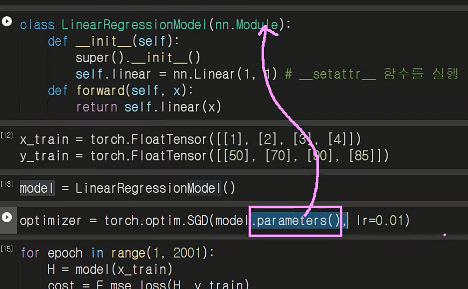

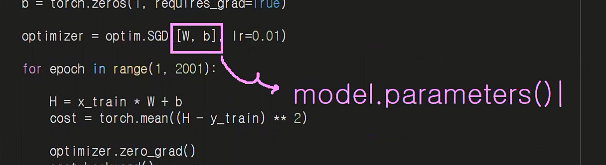

In [ ]:
val = torch.FloatTensor([[5.0]]) # 5시간일때 예측값을 찾는다
pred = model(val)
print('학습 후 5시간 공부하면 예상되는 성적: ', pred)

학습 후 5시간 공부하면 예상되는 성적:  tensor([[105.0592]], grad_fn=<AddmmBackward0>)


In [ ]:
print(list(model.parameters())) # 12.5287를 적용했고, bias는 42.4155으로 적용되었다.

[Parameter containing:
tensor([[12.5287]], requires_grad=True), Parameter containing:
tensor([42.4155], requires_grad=True)]
